In [6]:
import pandas as pd
from pathlib import Path

# Carpeta donde están los .csv
data_dir = Path.cwd() / "Precipitacion"

csv_files = list(data_dir.glob("*.csv"))

dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    df["estacion"] = file.stem
    dfs.append(df)

pluvio = pd.concat(dfs, ignore_index=True)

print("\nDataFrame final:", pluvio.shape)
pluvio.head()


DataFrame final: (694, 9)


,CodigoEstacion,NombreEstacion,Variable,Parametro,Fecha,Unidad,Valor,NivelAprobacion,estacion
0,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,1/1/2010 0:00,mm,71.4,Definitivo,23120050
1,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,2/1/2010 0:00,mm,57.3,Definitivo,23120050
2,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,3/1/2010 0:00,mm,196.3,Definitivo,23120050
3,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,4/1/2010 0:00,mm,481.5,Definitivo,23120050
4,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,5/1/2010 0:00,mm,357.0,Definitivo,23120050


In [8]:
# Convertir la columna Fecha a datetime
pluvio["Fecha"] = pd.to_datetime(pluvio["Fecha"], dayfirst=True, errors="coerce")

# Asegurar que la columna Valor sea numérica
pluvio["Valor"] = (
    pluvio["Valor"]
    .astype(str)
    .str.replace(",", ".", regex=False)   # cambiar coma por punto si la hubiera
    .str.replace(" ", "", regex=False)    # quitar espacios
)

pluvio["Valor"] = pd.to_numeric(pluvio["Valor"], errors="coerce")

# Crear columnas de año y mes
pluvio["Anio"] = pluvio["Fecha"].dt.year
pluvio["Mes"] = pluvio["Fecha"].dt.month

# Vista rápida
print(pluvio.dtypes)
pluvio.head()

CodigoEstacion              int64
NombreEstacion             object
Variable                   object
Parametro                  object
Fecha              datetime64[ns]
Unidad                     object
Valor                     float64
NivelAprobacion            object
estacion                   object
Anio                        int32
Mes                         int32
dtype: object


,CodigoEstacion,NombreEstacion,Variable,Parametro,Fecha,Unidad,Valor,NivelAprobacion,estacion,Anio,Mes
0,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,2010-01-01,mm,71.4,Definitivo,23120050,2010,1
1,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,2010-01-02,mm,57.3,Definitivo,23120050,2010,1
2,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,2010-01-03,mm,196.3,Definitivo,23120050,2010,1
3,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,2010-01-04,mm,481.5,Definitivo,23120050,2010,1
4,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,2010-01-05,mm,357.0,Definitivo,23120050,2010,1


In [10]:
# Restricción de fechas (dados factores de producción)
mask = pluvio["Fecha"].dt.year.between(2012, 2019)

pluvio = pluvio[mask].copy()

print("Dimensiones pluvio:", pluvio.shape)
pluvio.head()

Dimensiones pluvio: (371, 11)


,CodigoEstacion,NombreEstacion,Variable,Parametro,Fecha,Unidad,Valor,NivelAprobacion,estacion,Anio,Mes
24,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,2012-01-01,mm,104.2,Definitivo,23120050,2012,1
25,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,2012-01-02,mm,99.8,Definitivo,23120050,2012,1
26,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,2012-01-03,mm,357.1,Definitivo,23120050,2012,1
27,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,2012-01-04,mm,345.5,Definitivo,23120050,2012,1
28,23120050,MUZO [23120050],PRECIPITACION,Precipitación total mensual,2012-01-05,mm,242.1,Definitivo,23120050,2012,1


In [15]:
# Promedio de precipitación entre estaciones por mes
df_tmp = pluvio.copy()

# Agrupar por fecha y promediar el valor entre estaciones
pluvio_boy = (
    df_tmp
    .groupby("Fecha", as_index=False)["Valor"]
    .mean()
    .rename(columns={"Valor": "P_promedio_mm"})
)

print("Dimensiones de pluvio_boy:", pluvio_boy.shape)
pluvio_boy

Dimensiones de pluvio_boy: (96, 2)


,Fecha,P_promedio_mm
0,2012-01-01,89.925
1,2012-01-02,64.750
2,2012-01-03,224.175
3,2012-01-04,272.475
4,2012-01-05,204.925
...,...,...
91,2019-01-08,149.775
92,2019-01-09,139.775
93,2019-01-10,206.925
94,2019-01-11,168.875


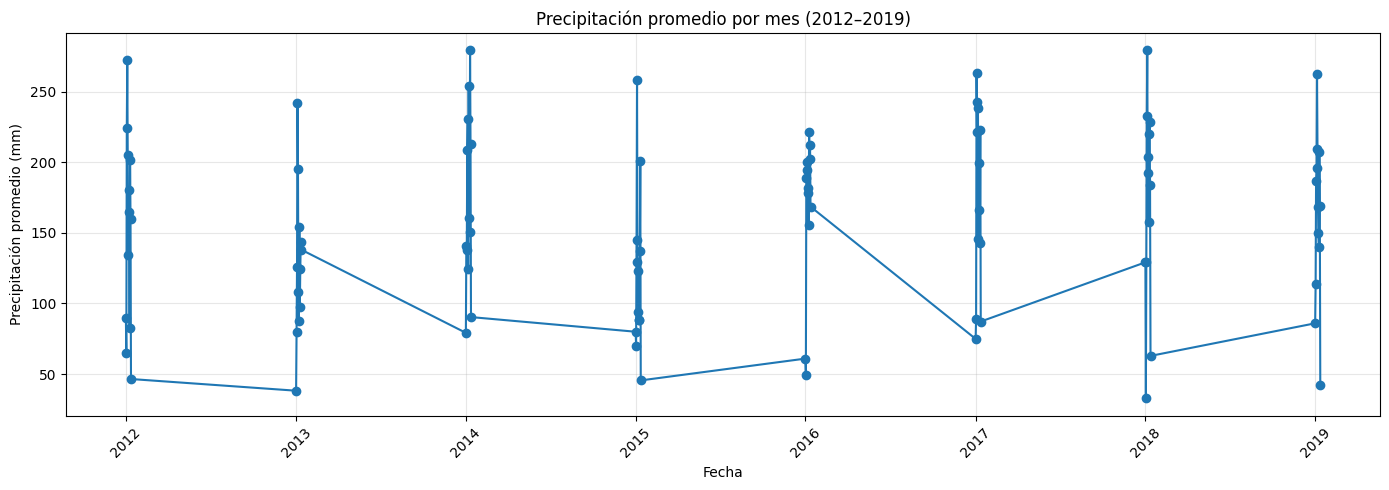

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.plot(
    pluvio_boy["Fecha"],
    pluvio_boy["P_promedio_mm"],
    marker="o"
)

plt.xlabel("Fecha")
plt.ylabel("Precipitación promedio (mm)")
plt.title("Precipitación promedio por mes (2012–2019)")
plt.xticks(rotation=45)

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [24]:
# Almacenamiento del archivo procesado

data_dir = Path.cwd() / "Data"
output_file = data_dir / "precipitacion_boy.csv"

# Exportar el dataframe
pluvio_boy.to_csv(output_file, index=False)
print("Archivo exportado en:", output_file)

Archivo exportado en: e:\DATA ANALIST\Git\Proyecto Despliegue\MIAD---PROYECTO---DESPLIEGUE-DE-SOLUCIONES\Data\precipitacion_boy.csv
